- teoria segnale, unità di misura! pa
- esercizi su max per calcolare le robe che mancano
- plotting ampiezza peak, peak-to-peak, rms visualization
(forse mettere a disposizione)


- fare plotting segnale periodico
- plotting di n onde periodiche non sommate
- plotting di onde sommate per dare nuove forme d'onda
- formule varie, però non così approfondita (roba elettroacustica però giusto saperla)

In [1]:
# Import vari
import librosa
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import librosa.display
%matplotlib inline

In [2]:
# Utilizzare per il salvataggio in pgf da in inserire in latex
# quando attivo non permette la visualizzazione del plot su jupyter
mpl.use("pgf")
mpl.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

# Capitolo 1

In [2]:
ciaccona = "/Users/maurizioberta/Documents/Max 8/Packages/MuBu For Max/media/ciaccona.aiff"
guitar = "/Volumes/CrucialX8/Musica/Samples/Libraries/Orchidea/Guitar/ordinario/Gtr-ord-A#2-ff-5c-T11d.wav"

ciaccon_data, sr = librosa.load(ciaccona)
guitar_data, sr = librosa.load(guitar)

###  1.2 Ampiezza e rappresentazione nel dominio del tempo

Figure forme d'onda, semplici e complesse. (Magari fare vedere robe tipo colpo di percussione che ha un decadimento molto visibile)

Text(0.5, 1.0, 'Ordinario chitarra La2 Fortissimo')

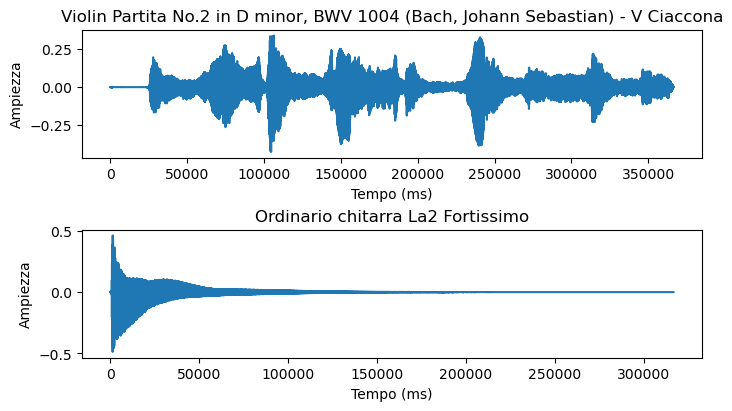

In [21]:
#ciao = librosa.feature.rms(y[1000:1010])
#S = librosa.magphase(librosa.stft(y, window=np.ones, center=False))[0]

#rms = librosa.feature.rms(S=S)
#print(rms)
#plt.plot(ciaccon_data)

#plt.axvline(x = 30500, ymin= 0.57, ymax = 1.4, color = 'r', label = 'axvline - full height', linewidth = 7, alpha = 0.5)
#plt.axvline(x = 5000, color = 'r', label = 'axvline - full height')

#usa effettivamente l'analisi peak to peak per vedere il segmento

#plt.vlines(x=120000, ymin= 0, ymax = y[120000], colors= 'r')


# Initialise the subplot function using number of rows and columns
figure, axis = plt.subplots(2, 1, figsize=(7, 4), layout='constrained')
  
# For Sine Function
axis[0].plot(ciaccon_data)
axis[0].set_xlabel("Tempo (ms)")
axis[0].set_ylabel("Ampiezza")
axis[0].set_title("Violin Partita No.2 in D minor, BWV 1004 (Bach, Johann Sebastian) - V Ciaccona")


# # For Sine Function
axis[1].plot(guitar_data)
axis[1].set_xlabel("Tempo (ms)")
axis[1].set_ylabel("Ampiezza")
axis[1].set_title("Ordinario chitarra La2 Fortissimo")

#plt.show()
#plt.savefig("../git_dispense/cs1-dispense/figures/forme_onda.pgf")

#plotting uno vicino all'altro di sole forme d'onda con descrizione sotto del suono in questione
# TODO Mesh per evidenziare i picchi con gradiente

Inserire 2 diverse rappresentazioni di forme d'onda con magari qualche evidenziatura dovuta all'ampiezza o altro.

In [3]:
def calculate_rms():
    #radice quadrata di:
    #ampiezze istantanee del range 
    #diviso numero di campioni nel range
    print("wewew")

In [8]:
plt.figure(figsize=(15, 5))
librosa.display.waveshow(y, sr, alpha=0.8)

/var/folders/sb/nmjd_gd95fg4y79qldtpm0ph0000gp/T/ipykernel_1245/3963043671.py:2: FutureWarning: Pass sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  librosa.display.waveshow(y, sr, alpha=0.8)


I computer catturano l'audio solo a momenti temporali discreti. L'intervallo a cui i computer catturano il dato audio è chiamato frequenza di campionamento (sampling frequency, a volte abbreviato fs) oppure sampling rate (sr)
Digital computers can only capture this data at discrete moments in time. The rate at which a computer captures audio data is called the sampling frequency (often abbreviated fs) or sampling rate (often abbreviated sr).

### 1.3 Misure dell’ampiezza

#### Idee per plotting di rms e peak
https://notebook.community/stevetjoa/stanford-mir/energy

come evidenziare una parte di matplotlib?

In [152]:
y.shape

(366366,)

#### Ampiezza istantanea:

- misurata a istanti specifici e determinati

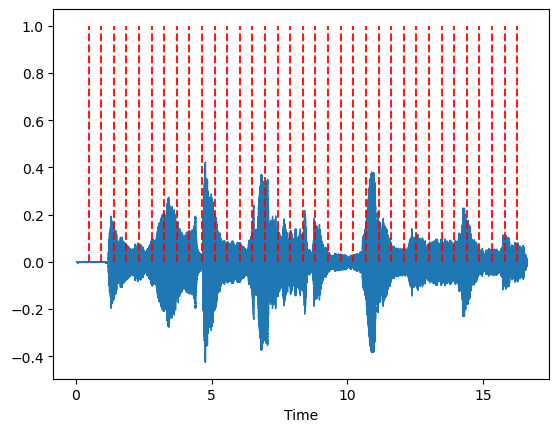

In [163]:
y, sr = librosa.load(ciaccona)

# Plotting Ampiezza Istantanea
fig, ax = plt.subplots(nrows=1, sharex=True)
#o_env = librosa.onset.onset_strength(y=y, sr=sr)
# faccio tipo dei marker a tempi costanti senza tenere conto dei picchi
#o_env
librosa.display.waveshow(y, sr=sr)
times = librosa.times_like(ciaccon_data, sr=sr)
n = []
i = 0
while i < (times.max() * 1850 / sr) :
    i = i + 20
    n.append(i)

n = np.array(n)

n = n[:-1]

#ora però voglio avere anche la label per ogni punto con il valore

ax.vlines(times[n], 0, 1, color='r', alpha=0.9, linestyle='--', label='Onsets')

In [164]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
from datetime import datetime

try:
    # Try to fetch a list of Matplotlib releases and their dates
    # from https://api.github.com/repos/matplotlib/matplotlib/releases
    import urllib.request
    import json

    url = 'https://api.github.com/repos/matplotlib/matplotlib/releases'
    url += '?per_page=100'
    data = json.loads(urllib.request.urlopen(url, timeout=1).read().decode())

    dates = []
    names = []
    for item in data:
        if 'rc' not in item['tag_name'] and 'b' not in item['tag_name']:
            dates.append(item['published_at'].split("T")[0])
            names.append(item['tag_name'])
    # Convert date strings (e.g. 2014-10-18) to datetime
    dates = [datetime.strptime(d, "%Y-%m-%d") for d in dates]

except Exception:
    # In case the above fails, e.g. because of missing internet connection
    # use the following lists as fallback.
    names = ['v2.2.4', 'v3.0.3', 'v3.0.2', 'v3.0.1', 'v3.0.0', 'v2.2.3',
             'v2.2.2', 'v2.2.1', 'v2.2.0', 'v2.1.2', 'v2.1.1', 'v2.1.0',
             'v2.0.2', 'v2.0.1', 'v2.0.0', 'v1.5.3', 'v1.5.2', 'v1.5.1',
             'v1.5.0', 'v1.4.3', 'v1.4.2', 'v1.4.1', 'v1.4.0']

    dates = ['2019-02-26', '2019-02-26', '2018-11-10', '2018-11-10',
             '2018-09-18', '2018-08-10', '2018-03-17', '2018-03-16',
             '2018-03-06', '2018-01-18', '2017-12-10', '2017-10-07',
             '2017-05-10', '2017-05-02', '2017-01-17', '2016-09-09',
             '2016-07-03', '2016-01-10', '2015-10-29', '2015-02-16',
             '2014-10-26', '2014-10-18', '2014-08-26']

    # Convert date strings (e.g. 2014-10-18) to datetime
    dates = [datetime.strptime(d, "%Y-%m-%d") for d in dates]

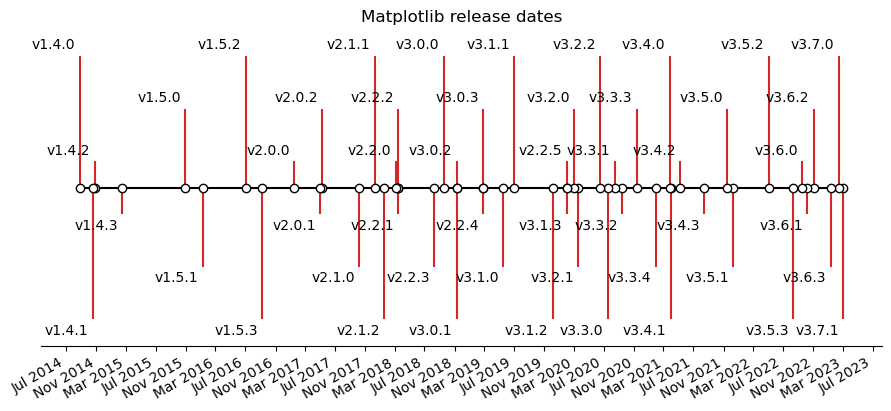

In [165]:
# Choose some nice levels
levels = np.tile([-5, 5, -3, 3, -1, 1],
                 int(np.ceil(len(dates)/6)))[:len(dates)]

# Create figure and plot a stem plot with the date
fig, ax = plt.subplots(figsize=(8.8, 4), layout="constrained")
ax.set(title="Matplotlib release dates")

ax.vlines(dates, 0, levels, color="tab:red")  # The vertical stems.
ax.plot(dates, np.zeros_like(dates), "-o",
        color="k", markerfacecolor="w")  # Baseline and markers on it.

# annotate lines
for d, l, r in zip(dates, levels, names):
    ax.annotate(r, xy=(d, l),
                xytext=(-3, np.sign(l)*3), textcoords="offset points",
                horizontalalignment="right",
                verticalalignment="bottom" if l > 0 else "top")

# format x-axis with 4-month intervals
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=4))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
plt.setp(ax.get_xticklabels(), rotation=30, ha="right")

# remove y-axis and spines
ax.yaxis.set_visible(False)
ax.spines[["left", "top", "right"]].set_visible(False)

ax.margins(y=0.1)
plt.show()

In [103]:
print(n[2])
print(times[n[2]])
# print(o_env.size)

300000
6965.986394557823


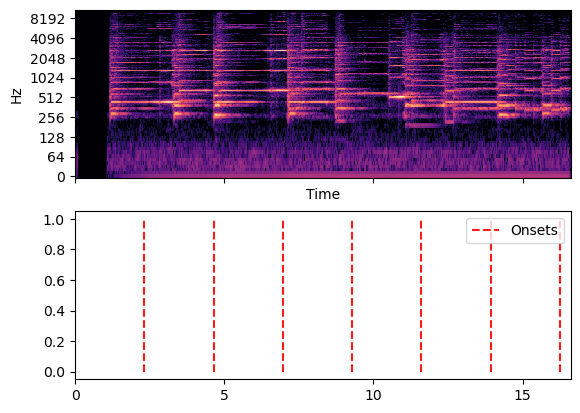

In [85]:
y, sr = librosa.load(ciaccona)

# librosa.onset.onset_detect(y=y, sr=sr, units='time')

o_env = librosa.onset.onset_strength(y=y, sr=sr)

times = librosa.times_like(o_env, sr=sr)

onset_frames = librosa.onset.onset_detect(onset_envelope=o_env, sr=sr)

D = np.abs(librosa.ty6(y))

fig, ax = plt.subplots(nrows=2, sharex=True)

librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max),x_axis='time', y_axis='log', ax=ax[0])

#ax[0].set(title='Power spectrogram')

#ax[0].label_outer()

#ax[1].plot(times, o_env, label='Onset strength')

ax[1].vlines(times[n], 0, 1, color='r', alpha=0.9,

           linestyle='--', label='Onsets')

ax[1].legend()

In [34]:
#import matplotlib.pylab as plt

x = np.linspace(0, 2* np.pi, 201)

plt.plot(x, np.sin(x))

plt.plot(x, np.cos(x))

plt.xlabel('Angle [rad]')

plt.ylabel('seno(x) and coseno(x)')

plt.axis('tight')
plt.title('Plot del seno e del coseno da 0 a 2 pi')

plt.legend(['seno(x)', 'coseno(x)'])   

plt.show()

#plt.plot(x,y,x,z)
#plt.xlabel('x values from 0 to 4pi')  # string must be enclosed with quotes '  '
#plt.ylabel('sin(x) and cos(x)')
#plt.title('Plot of sin and cos from 0 to 4pi')
#plt.legend(['sin(x)', 'cos(x)'])      # legend entries as seperate strings in a list
#plt.show()
#plt.savefig("../git_dispense/cs1-dispense/figures/seno_coseno.pgf")


/var/folders/sb/nmjd_gd95fg4y79qldtpm0ph0000gp/T/ipykernel_2120/2354500464.py:18: UserWarning: Matplotlib is currently using pgf, which is a non-GUI backend, so cannot show the figure.
  plt.show()


#### Ampiezza Picco

- massimo valore locale

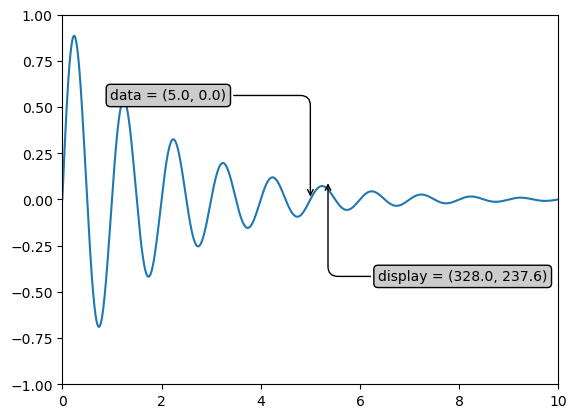

In [3]:
# Plotting Ampiezza Picco

x = np.arange(0, 10, 0.005)
y = np.exp(-x/2.) * np.sin(2*np.pi*x)

fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_xlim(0, 10)
ax.set_ylim(-1, 1)

xdata, ydata = 5, 0
# This computing the transform now, if anything
# (figure size, dpi, axes placement, data limits, scales..)
# changes re-calling transform will get a different value.
xdisplay, ydisplay = ax.transData.transform((xdata, ydata))

bbox = dict(boxstyle="round", fc="0.8")
arrowprops = dict(
    arrowstyle="->",
    connectionstyle="angle,angleA=0,angleB=90,rad=10")

offset = 72
ax.annotate('data = (%.1f, %.1f)' % (xdata, ydata),
            (xdata, ydata), xytext=(-2*offset, offset), textcoords='offset points',
            bbox=bbox, arrowprops=arrowprops)

disp = ax.annotate('display = (%.1f, %.1f)' % (xdisplay, ydisplay),
                   (xdisplay, ydisplay), xytext=(0.5*offset, -offset),
                   xycoords='figure pixels',
                   textcoords='offset points',
                   bbox=bbox, arrowprops=arrowprops)

plt.show()

(-2.0, 2.0)

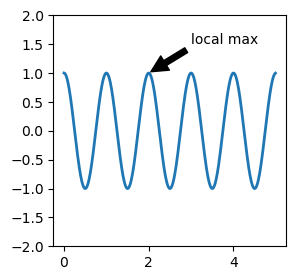

In [166]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(3, 3))

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)
line, = ax.plot(t, s, lw=2)

ax.annotate('local max', xy=(2, 1), xytext=(3, 1.5),
            arrowprops=dict(facecolor='black', shrink=0.05))
ax.set_ylim(-2, 2)

#### Ampiezza Picco-Picco

In [ ]:
# Plotting Ampiezza Picco-Picco

#### Ampiezza RMS

In [ ]:
# Plotting Ampiezza RMS

#### Riassunto

/var/folders/sb/nmjd_gd95fg4y79qldtpm0ph0000gp/T/ipykernel_2120/2250528725.py:9: FutureWarning: Pass y=[-6.35871984e-05 -1.50527922e-04 -8.26141186e-05 ... -3.15847028e-05
 -1.11231375e-05 -8.82297536e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rmse = librosa.feature.rms(ciaccon_data, frame_length=frame_length, hop_length=hop_length, center=True)


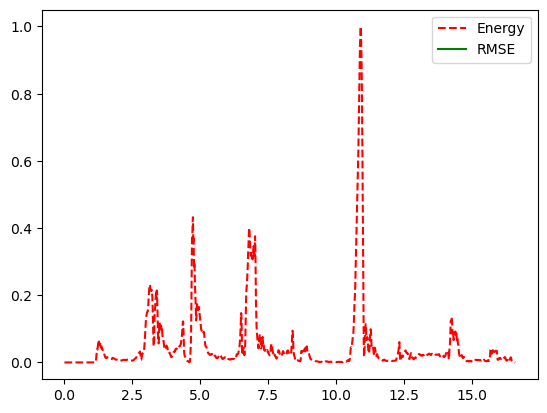

In [19]:
# Plotting differenza tra i vari valori misurati
hop_length = 256
frame_length = 512

energy = np.array([
    sum(abs(ciaccon_data[i:i+frame_length]**2))
    for i in range(0, len(ciaccon_data), hop_length)
])

rmse = librosa.feature.rms(ciaccon_data, frame_length=frame_length, hop_length=hop_length, center=True)
#rmse = librosa.feature.rms(ciaccon_data)
frames = range(len(energy))
t = librosa.frames_to_time(frames, sr=sr, hop_length=hop_length)


#librosa.display.waveplot(ciaccon_data, sr=sr, alpha=0.4)
#plt.plot(ciaccon_data)
plt.plot(t, energy/energy.max(), 'r--')             # normalized for visualization
plt.plot(t[:len(rmse)], rmse/rmse.max(), color='g') # normalized for visualization
plt.legend(('Energy', 'RMSE'))



### 1.6 Logaritmi

In [3]:
import math

length = 10
base_10 = []
base_e = []

for i in range(length):
    temp_value = math.log(i + 1)
    base_10.append(temp_value)

for i in range(length):
    temp_value = math.log10(i + 1)
    base_e.append(temp_value)


plt.plot(base_10)
plt.plot(base_e)

plt.savefig("../git_dispense/cs1-dispense/figures/log.pgf")

### 1.7 I Decibel

http://msp.ucsd.edu/techniques/v0.11/book-html/node9.html

1.9 
- piccola aritmetica dei decibel - fondamentale
- funzione che calcola max dBSpl rappresentabile

# Capitolo 2

### 2.5 Segnali periodici, puri e composti

In [3]:
y = librosa.tone(2, duration= 1)
sr = 22050
# a frequenza di campionamento n quanti campioni mi servono per plottare ...

In [4]:
# ciclo for per costruire square wave
def sawtooth(nr_tones):
    y = 0;

    for i in range(nr_tones):
        #però solo numeri dispari
        y = y + librosa.tone(2 * (i+1), duration= 1) / (i+1)
    return y

def square(nr_tones):
    y = 0;

    for i in range(nr_tones):
        #però solo numeri dispari noo 
        if i%2 != 0:
            y = y + librosa.tone(2 * (i), duration= 1) / (i)
    return y

def triangle(nr_tones):
    y = 0

    for i in range(nr_tones):
         if i%2 == 0:
            y = y + librosa.tone(2 * (i), duration= 1) / (i)
    return y

In [8]:
plt.plot(sawtooth(100))
plt.plot(square(10))
#plt.plot(triangle(10))
plt.savefig('sawtooth.pgf')

- processo di sintesi composto (obiettivo realizzare composizione con sole tecniche di sintesi - quali sono gli esempi musicali?)

### 2.6 Categorie di spettri

- spettri armonici, inarmonici (mancano le formule delle sommatorie)

# Extra da Organizzare

Rappresentazione intera vs virgola mobile
decimazione lineare, bit quantizzazione etc..
int vs floating point

(n-1)*6db

In [104]:
def calculate_representable_db (bitrate):
    rep = ((bitrate-1) * 6)
    print(str(rep) + "dBFs")

In [109]:
calculate_representable_db(24)

138dBFs


## Teoria dei temperamenti

- Rapporti armonici semplici
- Sistema temperato
- etc..

## Trasformata di Fourier!!!!!!

## Sintesi e robe varie

## Funzione per costruire compressori

Suono e cercare di riprodurre, capire come ricreare un suono. 

- lfo a tecniche di modulazione
- teoria dei filtri
- sintesi additiva e polifonia (poly~ nelle varie modalità)
- costruire sintetizzatore additivo su multislider
- far ascoltare risset nel caso
- polyphony tutorial (max msp - 1)
- fade
- tassonomia dei file audio 
- esercizio, costruire un campionatore
- linee di ritardo
- filtri -> (confronto tra i vari filtri in max - differenza di controllo in messaggio con controllo in segnale)

### esercizi banali
- da file audio ricostruisci la patch 
- fm - esercizi su fm da suono lo analizzo e lo ricreo
- ricostruire inviluppi

- Applicare lfo a parametri diversi.....
- durate linee di ritardo, frequenze esterne
- lavorare su scale e ambiti diversi, frequenza vs nota?
- scala logaritmica cambiare 
- pendenza linee
- buffer!


### esercizi meno banali

- costruire un campionatore
- 0 click parte suono
- 1 modificare parametri suono
- 2 tastiere midi (mapping parametri)
- 3 cambio intonazione a seconda del tasto
- 4 f0 iana~ (nah)
- 5 alterando la scala (utilizzando trasposizioni di tipo diverso)
- 6 velocity come controllo non solo dinamico ma anche filtro, aftertouch 
- 7 rendere polifonico il campionatore, problema aftertouch con poly, mettere in corrispondenza voce e tasto premuto.


POLIFONIA

### campionatore a trigger e campionatore che segue la nota
- individuare la fine del campione e utilizzarlo per liberare la voce
tipo in supercollider done:freeself e robe
- thispoly!

# immagini necessarie:

- 1.1 onde di pressione longitudinali che si propagano in mezzo elastico
onda trasversale vs onda longitudinale
prodotto da corpo emittente e un recettore
corpo emittente in oscillazione, crea nell'aria compressioni e decompressioni, che si propagano in forma di superfici sferiche

 misura della pressione ? PASCAL - con multipli vari, mPa μPa kPa, bar

pressione atmosferica standard = 100 000 Pa

variazioni dei suoni udibili avvengono in ambito tra i 20 µPa e 20 Pa

recettore immerso nell'atmosfera - in generale pressione atmosferica sulla membrana è considerata nulla (tranne monti ,gallerie,...)
pressione positiva = pressione esterna maggiore di quella interna
pressione negativa = opposto

velocità del suono standard al livello del mare = 343 m/s

- 1.2 ampiezza 

- Ampiezza istantanea:

Inserire figura - intervallo di tempo tra una misurazione e l'altra.

- Ampiezza picco:

Inserire figura - valore massimo (in valore assoluto) in un determinato intervallo di tempo, la misurazione avviene ad intervalli regolari. (può essere raggiunta più volte)

- Ampiezza picco-picco:

Inserire figura - valore assoluto della differenza tra la massima e la minima ampiezza entro un dato intervallo di tempo, in pratica gli estremi.
Affidabile se la forma d'onda non è centrata sullo zero.

- Ampiezza RMS:


Inserire figura recap - misura dell'andamento dell'ampiezza nell'intervallo. Mai maggiore dell'ampiezza di picco. Non è mai negativa (ovvio è uno square root)

- 1.4 intensità sonora



- 1.6 Log

Magari introdurre curva dell'andamento, cioè ad esempio elevazione a potenza versus log

- 1.7 deciBel

Magari introdurre curva dell'andamento, cioè ad esempio elevazione a potenza versus log

REFUSI:

1.7 Decibel riga 263 file LateX distanza percettiva No - distanza rilevata!